## In this assignment program we will import stocks data from Yahoo Finance using Parsing and Cleaning the data, we will create a program that can calculate each and every individual stock returns, variance/co-variance matrix and finally we will do the monte carlo simulation for total 10,000 portfolios for 10 stocks using their tickers

In [1]:
# Import all the library you need in order to run your portfolio optimization project
# importing pandas and numpy helps you manipulate data the best

import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import pandas_datareader.data as source
import seaborn as sns
 # matplotlib is good for plotting but not as good as seaborn because its object oriented
import datetime as dt 
#Importing datetime helps with using start date and end dates for our data reader function
import yfinance as yf
#Imporing yfinance above allows us to avoid making a loop and storing all 10 tickers on a monthly basis for their stock return in one dataframe


## 1) Download monthly stock return data for the following companies from any data provider (for 10 years)

In [2]:
#below now we defined a variable called tickers to call later with all the 10 stocks we want in our dataframe
tickers = ['AAPL','BAC','BA','BBY','HOG','HD','RTX','IHG','SBUX','XOM']

#now we created a dataframe where we are feeding the data from yahoo finance
dataframe = yf.download('AAPL BAC BA BBY HOG HD RTX IHG SBUX XOM', start = "2012-10-01", end = dt.datetime.today(), interval = '1mo')
print(dataframe)

[*********************100%***********************]  10 of 10 completed
             Adj Close                                                \
                  AAPL          BA        BAC        BBY          HD   
Date                                                                   
2012-10-01   18.231625   58.667355   7.957662  11.189845   49.148609   
2012-10-09         NaN         NaN        NaN        NaN         NaN   
2012-11-01   17.924150   61.865589   8.418728   9.644897   52.103287   
2012-11-07         NaN         NaN        NaN        NaN         NaN   
2012-11-13         NaN         NaN        NaN        NaN         NaN   
...                ...         ...        ...        ...         ...   
2022-08-18         NaN         NaN        NaN        NaN         NaN   
2022-08-31         NaN         NaN        NaN        NaN         NaN   
2022-09-01  138.199997  121.080002  30.002321  62.572559  275.940002   
2022-09-09         NaN         NaN        NaN        NaN         

## We need to clean the data form above and redefine our dataframe so that we don't use null values for our calculations

In [3]:
# based on how stocks are calculated on a daily basis, we only do care about the adjusted close value.
# lets retrive that for our dataframe and just use the Adjusted Close Value

dataframe = dataframe['Adj Close']

# some of the values we get above have null values, therefore now we will clean our data to just use the montly Adjusted close values for the tickers

dataframe = dataframe.dropna()
# with that code above we now go from a array that was (444 rows x 60 columns) to (120 rows x 10 columns) for our data by taking away the null values

print(dataframe)

                  AAPL          BA        BAC        BBY          HD  \
Date                                                                   
2012-10-01   18.231625   58.667355   7.957662  11.189845   49.148609   
2012-11-01   17.924150   61.865589   8.418728   9.644897   52.103287   
2012-12-01   16.372099   63.150887   9.912923   8.717927   49.748028   
2013-01-01   14.013060   61.902294   9.675076  12.129147   53.826004   
2013-02-01   13.579582   64.441391   9.598155  12.241038   55.096848   
...                ...         ...        ...        ...         ...   
2022-05-01  148.415466  131.399994  36.744862  80.083130  298.899750   
2022-06-01  136.530350  136.720001  30.749126  63.619537  270.781952   
2022-07-01  162.284576  159.309998  33.588692  76.057175  298.989197   
2022-08-01  157.001923  160.250000  33.389999  69.833511  286.550354   
2022-09-01  138.199997  121.080002  30.002321  62.572559  275.940002   

                  HOG        IHG        RTX       SBUX        X

## 2) Now we will calculate expected return for each company and store it in a new dataframe

In [5]:
# now that we have our cleaned data and we have everything ready we will start doing calculations
# first lets define our funcitons to call them later and make our program efficient

# lets start with the first funciton for percentage change on a monthly basis from the previous month and store it on its own dataframe for later use

dataframe_expected_return = dataframe.pct_change(1)
print(dataframe_expected_return)

                AAPL        BA       BAC       BBY        HD       HOG  \
Date                                                                     
2012-10-01       NaN       NaN       NaN       NaN       NaN       NaN   
2012-11-01 -0.016865  0.054515  0.057940 -0.138067  0.060117  0.004277   
2012-12-01 -0.086590  0.020776  0.177485 -0.096110 -0.045204  0.039822   
2013-01-01 -0.144089 -0.019772 -0.023994  0.391288  0.081973  0.076998   
2013-02-01 -0.030934  0.041018 -0.007950  0.009225  0.023610  0.004006   
...              ...       ...       ...       ...       ...       ...   
2022-05-01 -0.055883 -0.117173  0.042601 -0.087513  0.007823 -0.034842   
2022-06-01 -0.080080  0.040487 -0.163172 -0.205581 -0.094071 -0.100057   
2022-07-01  0.188634  0.165228  0.092346  0.195500  0.104170  0.199639   
2022-08-01 -0.032552  0.005900 -0.005915 -0.081829 -0.041603  0.020101   
2022-09-01 -0.119756 -0.244431 -0.101458 -0.103975 -0.037028 -0.095670   

                 IHG       RTX      S

## 3) Now we are going to calculate standard deviation for each company

In [7]:
# now we need to do the standard deviation function for each company and store it on its own dataframe for later use

dataframe_risk = dataframe.std()
pdataframe_risk)

AAPL    48.304431
BA      94.163068
BAC      9.722908
BBY     29.628893
HD      88.750106
HOG      8.316767
IHG     13.353869
RTX     13.961760
SBUX    25.154313
XOM     11.330814
dtype: float64


## 4) Calculate variance-covariance matrix for each company pair 

In [9]:
# now we need to do the variance function for each company and store it on its own dataframe for later use

dataframe_variance = dataframe.var()
print(dataframe_variance)


# now we need to do the covariance function for each company and store it on its own dataframe for later use
# when we talk about covariance in finance we are talking about covariance of your expected returns for the stocks

dataframe_covariance = dataframe_expected_return.cov()
print(dataframe_covariance)

AAPL    2333.318028
BA      8866.683365
BAC       94.534934
BBY      877.871277
HD      7876.581248
HOG       69.168617
IHG      178.325819
RTX      194.930741
SBUX     632.739467
XOM      128.387348
dtype: float64
          AAPL        BA       BAC       BBY        HD       HOG       IHG  \
AAPL  0.006536  0.002292  0.001910  0.003294  0.001821  0.002577  0.002029   
BA    0.002292  0.010651  0.003952  0.003099  0.001959  0.003669  0.003938   
BAC   0.001910  0.003952  0.006873  0.003264  0.002100  0.003387  0.003105   
BBY   0.003294  0.003099  0.003264  0.013074  0.003196  0.005152  0.003348   
HD    0.001821  0.001959  0.002100  0.003196  0.003583  0.002415  0.001572   
HOG   0.002577  0.003669  0.003387  0.005152  0.002415  0.008972  0.003010   
IHG   0.002029  0.003938  0.003105  0.003348  0.001572  0.003010  0.006185   
RTX   0.001479  0.004379  0.003201  0.002381  0.001473  0.003128  0.003346   
SBUX  0.001482  0.002145  0.001879  0.001677  0.001382  0.001632  0.002070   
XOM  

## 5.c.) Do a Monte Carlo simulation of 10000 portfolios for these companies using the following criteria: Sum of weights should be 1.

In [11]:
# now we will created a simulation for 10000 portfolios (Monte Carlo Simulation)
# First for monte carlo simulation we need the mean of the expected return dataframe
# lets create a new dataframe for mean expected returns

dataframe_mean_returns = dataframe_expected_return.mean()

# below we defining number of iteration

n = 10000

# lets create an empty array with 14 columns and 10000 rows (10 of the columns will be weights, 4 will be returns, stadard deviation, sharpe ratio and variance)

array_res = np.zeros((4+len(tickers), n))

# Now we will write a four loop for our simulation results

for i in range(n):
    # generate an array of random weights
    weights = np.array(np.random.random(len(tickers)))
    # making sure that our sum always gives us 1 for our weights
    weights /= np.sum(weights)
    # now we create an array for our portfolio returns
    return_portfolio = np.sum(dataframe_mean_returns * weights)
    # now we create an array for standard deviation
    std_portfolio = np.sqrt(np.dot(weights.T, np.dot(dataframe_covariance,weights)))
    # now we need to fill the arrays with our simulation results
    array_res[0,i] = return_portfolio
    array_res[1,i] = std_portfolio
    # The third column on our array will be sharpe ratio which will be our expected return/standard deviation
    array_res[2,i]= array_res[0,i]/array_res[1,i]
    # The fourth coloum on our array will be variance
    array_res[3,i]= array_res[1,i]**2
    for k in range(len(weights)):
        array_res[k+4, i] = weights[k]

# now we create a dataframe for the results from our simulation from the above loop
dataframe_sim_results = pd.DataFrame(array_res.T, columns = ['Expected Returns', 'StDev', 'Sharpe Ratio', 'Variance', 
                                                                 tickers[0], tickers[1], tickers[2], tickers[3], tickers[4], 
                                                                 tickers[5], tickers[6], tickers[7], tickers[8], tickers[9]])
print(dataframe_sim_results)

      Expected Returns     StDev  Sharpe Ratio  Variance      AAPL       BAC  \
0             0.013265  0.054330      0.244147  0.002952  0.151917  0.036682   
1             0.013422  0.053283      0.251907  0.002839  0.110841  0.054984   
2             0.013394  0.054437      0.246053  0.002963  0.115229  0.121120   
3             0.013111  0.052787      0.248371  0.002786  0.172324  0.104090   
4             0.012167  0.057060      0.213234  0.003256  0.139263  0.134428   
...                ...       ...           ...       ...       ...       ...   
9995          0.014619  0.066692      0.219198  0.004448  0.005895  0.175833   
9996          0.012962  0.053528      0.242151  0.002865  0.194052  0.089621   
9997          0.012655  0.059000      0.214483  0.003481  0.026179  0.185781   
9998          0.012640  0.054165      0.233366  0.002934  0.143017  0.094715   
9999          0.011182  0.056961      0.196312  0.003245  0.039499  0.125181   

            BA       BBY       HOG     

## 6) Now we will plot the expected return and risk of these 10000 portfolios.

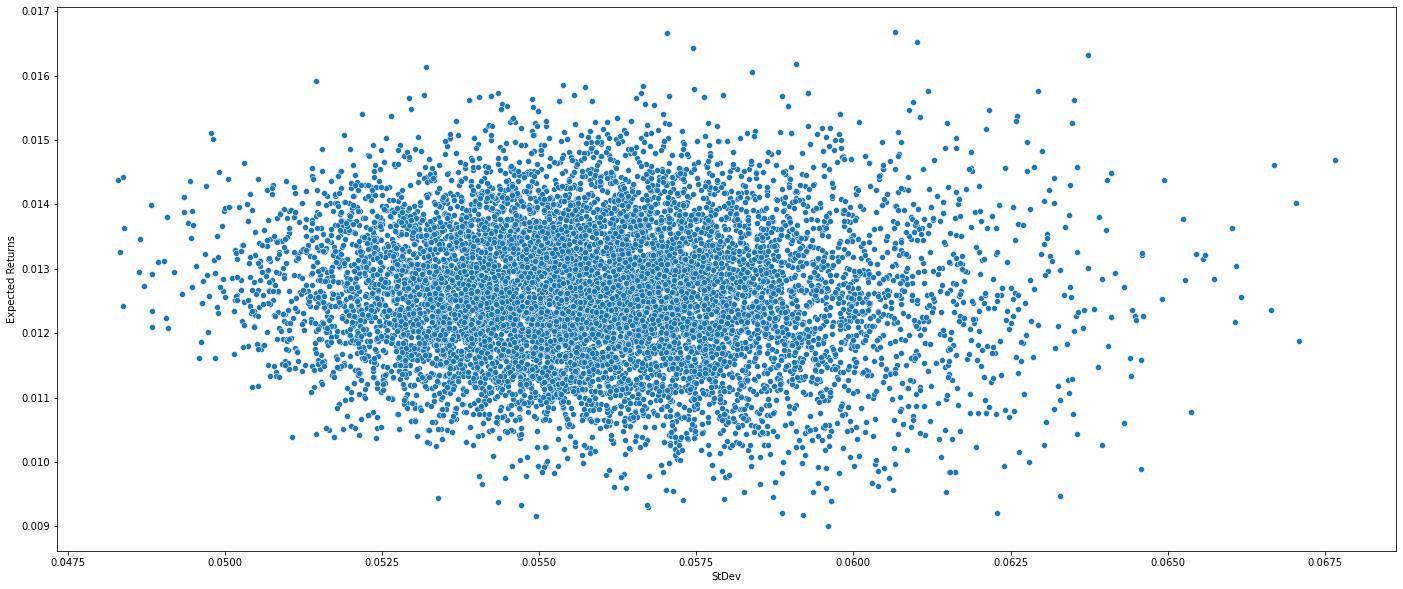

In [12]:
# now we will use seaborn package to plot our results with x-axis being standard deviation and y-axis being returns

plt.figure(figsize=(24,10))
simulation_plot = sns.scatterplot(dataframe_sim_results, x = 'StDev', y = 'Expected Returns')


## 7) Now do the same exact thing using riskfree rate give. How will the graph look like if you assume risk free rate is 0.2%?

In [13]:
# for assumption of risk free rate being .2 lets first create a new returns dataframe with the risk free rate appended as the last column

dataframe_riskfree = dataframe_expected_return
dataframe_riskfree['Risk Free'] = 0.002
print(dataframe_riskfree)

                AAPL        BA       BAC       BBY        HD       HOG  \
Date                                                                     
2012-10-01       NaN       NaN       NaN       NaN       NaN       NaN   
2012-11-01 -0.016865  0.054515  0.057940 -0.138067  0.060117  0.004277   
2012-12-01 -0.086590  0.020776  0.177485 -0.096110 -0.045204  0.039822   
2013-01-01 -0.144089 -0.019772 -0.023994  0.391288  0.081973  0.076998   
2013-02-01 -0.030934  0.041018 -0.007950  0.009225  0.023610  0.004006   
...              ...       ...       ...       ...       ...       ...   
2022-05-01 -0.055883 -0.117173  0.042601 -0.087513  0.007823 -0.034842   
2022-06-01 -0.080080  0.040487 -0.163172 -0.205581 -0.094071 -0.100057   
2022-07-01  0.188634  0.165228  0.092346  0.195500  0.104170  0.199639   
2022-08-01 -0.032552  0.005900 -0.005915 -0.081829 -0.041603  0.020101   
2022-09-01 -0.119756 -0.244431 -0.101458 -0.103975 -0.037028 -0.095670   

                 IHG       RTX      S

In [14]:
# Now we will recreact a different dataframe for covariance matrix taking into consideration the riskfree rate as well.

dataframe_riskfree_cov = dataframe_riskfree.cov()
print(dataframe_riskfree_cov)

               AAPL        BA       BAC       BBY        HD       HOG  \
AAPL       0.006536  0.002292  0.001910  0.003294  0.001821  0.002577   
BA         0.002292  0.010651  0.003952  0.003099  0.001959  0.003669   
BAC        0.001910  0.003952  0.006873  0.003264  0.002100  0.003387   
BBY        0.003294  0.003099  0.003264  0.013074  0.003196  0.005152   
HD         0.001821  0.001959  0.002100  0.003196  0.003583  0.002415   
HOG        0.002577  0.003669  0.003387  0.005152  0.002415  0.008972   
IHG        0.002029  0.003938  0.003105  0.003348  0.001572  0.003010   
RTX        0.001479  0.004379  0.003201  0.002381  0.001473  0.003128   
SBUX       0.001482  0.002145  0.001879  0.001677  0.001382  0.001632   
XOM        0.001214  0.002893  0.002964  0.002696  0.001347  0.002583   
Risk Free  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

                IHG       RTX      SBUX       XOM  Risk Free  
AAPL       0.002029  0.001479  0.001482  0.001214        0.0

In [15]:
# now follow all the steps above that we did without the risk free rate to create all dataframe that includes riskfree
# rate in order to do a different Monte Carlo Simulation of Risky and Risk Free assets

# below we will first create a dataframe that is for the mean of all the expected returns including the riskfree rate
dataframe_riskfree_mean = dataframe_riskfree.mean()

array_res_rf = np.zeros((5+len(tickers), n))

# Now we will write a four loop for our simulation results

for i in range(n):
    # generate an array of random weights
    weights = np.array(np.random.random(len(tickers)+1))
    # making sure that our sum always gives us 1 for our weights
    weights /= np.sum(weights)
    # now we create an array for our portfolio returns
    return_portfolio = np.sum(dataframe_riskfree_mean * weights)
    # now we create an array for standard deviation
    std_portfolio = np.sqrt(np.dot(weights.T, np.dot(dataframe_riskfree_cov,weights)))
    # now we need to fill the arrays with our simulation results
    array_res_rf[0,i] = return_portfolio
    array_res_rf[1,i] = std_portfolio
    # The third column on our array will be sharpe ratio which will be our expected return/standard deviation
    array_res_rf[2,i]= array_res_rf[0,i]/array_res_rf[1,i]
    # The fourth coloum on our array will be variance
    array_res_rf[3,i]= array_res_rf[1,i]**2
    for k in range(len(weights)):
        array_res_rf[k+4, i] = weights[k]

dataframe_sim_results_rf = pd.DataFrame(array_res_rf.T, columns = ['Expected Returns', 'StDev', 'Sharpe Ratio', 'Variance', 
                                                                 tickers[0], tickers[1], tickers[2], tickers[3], tickers[4], 
                                                                 tickers[5], tickers[6], tickers[7], tickers[8], tickers[9], 
                                                                   'Risk Free'])
print(dataframe_sim_results_rf)


      Expected Returns     StDev  Sharpe Ratio  Variance      AAPL       BAC  \
0             0.013714  0.053598      0.255861  0.002873  0.028564  0.155987   
1             0.010578  0.050722      0.208558  0.002573  0.009815  0.133983   
2             0.011947  0.055334      0.215908  0.003062  0.025048  0.132424   
3             0.012163  0.051987      0.233968  0.002703  0.108044  0.015048   
4             0.013128  0.050101      0.262028  0.002510  0.123494  0.017458   
...                ...       ...           ...       ...       ...       ...   
9995          0.014053  0.055770      0.251981  0.003110  0.166378  0.032071   
9996          0.011658  0.055270      0.210923  0.003055  0.156642  0.153245   
9997          0.012950  0.055979      0.231330  0.003134  0.143379  0.133839   
9998          0.010565  0.043015      0.245616  0.001850  0.144940  0.004704   
9999          0.008657  0.047907      0.180713  0.002295  0.041024  0.114850   

            BA       BBY       HOG     

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


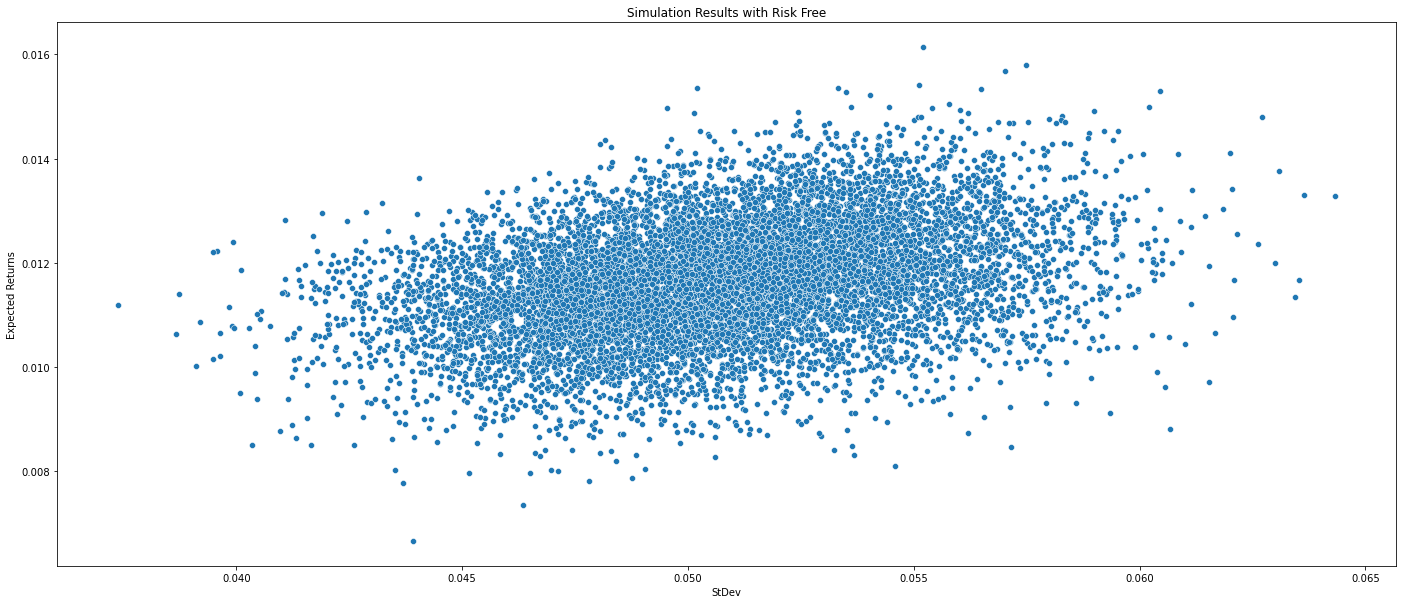

In [16]:
# Now we will plot a new scatterplot for our Monte Carlo Simulation that includes the riskfree rate in consideration

plt.figure(figsize=(24,10))
plt.title('Simulation Results with Risk Free')
simulation_plot_rf = sns.scatterplot(dataframe_sim_results_rf, x = 'StDev', y = 'Expected Returns')
print(simulation_plot_rf)
print(simulation_plot)

## In conclusion, with the risk free rate assumtion as 0.2% our efficient frontier moves down and to the left compared to without a risk free investment.